In [10]:
#
# hw5pr3 predicting restaurant scores based on inspection characteristics
#

In [11]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

In [12]:
# for read_csv, use header=0 when row 0 is a header row
# 
filename = 'restuarant.csv'
df = pd.read_csv(filename, header=0)   # encoding="latin1" et al.
print(f"{filename} : file read into a pandas dataframe.")

restuarant.csv : file read into a pandas dataframe.


In [13]:
#
# a dataframe is a "spreadsheet in Python"   (seems to have an extra column!)
#
pd.set_option('display.max_rows', 10)     # None for no limit; default: 10
df.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,835,Kam Po Kitchen,801 Broadway St,San Francisco,CA,94133,37.797223,-122.410513,POINT (-122.410513 37.797223),NaN,...,88.0,Routine - Unscheduled,835_20180917_103139,Improper food storage,Low Risk,107.0,107.0,6.0,3.0,6.0
1,905,Working Girls' Cafe',0259 Kearny St,San Francisco,CA,94108,37.790477,-122.404033,POINT (-122.404033 37.790477),NaN,...,87.0,Routine - Unscheduled,905_20190415_103114,High risk vermin infestation,High Risk,19.0,19.0,6.0,3.0,8.0
2,1203,TAWAN'S THAI FOOD,4403 GEARY Blvd,San Francisco,CA,94118,37.780834,-122.466590,POINT (-122.46659 37.780834),1.415576e+10,...,77.0,Routine - Unscheduled,1203_20170803_103120,Moderate risk food holding temperature,Moderate Risk,5.0,5.0,8.0,4.0,11.0
3,1345,Cordon Bleu,1574 California St,San Francisco,CA,94109,37.790683,-122.420264,POINT (-122.420264 37.790683),NaN,...,81.0,Routine - Unscheduled,1345_20170928_103105,Improper cooling methods,High Risk,105.0,105.0,4.0,3.0,21.0
4,1352,LA TORTILLA,495 Castro St B,San Francisco,CA,94114,37.760954,-122.434935,POINT (-122.434935 37.760954),1.415586e+10,...,74.0,Routine - Unscheduled,1352_20180620_103177,Non service animal,Low Risk,38.0,38.0,3.0,5.0,5.0


In [14]:
#
# let's look at our pandas dataframe
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53973 entries, 0 to 53972
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   business_id                   53973 non-null  int64  
 1   business_name                 53973 non-null  object 
 2   business_address              53973 non-null  object 
 3   business_city                 53973 non-null  object 
 4   business_state                53973 non-null  object 
 5   business_postal_code          52787 non-null  object 
 6   business_latitude             27475 non-null  float64
 7   business_longitude            27475 non-null  float64
 8   business_location             27460 non-null  object 
 9   business_phone_number         17672 non-null  float64
 10  inspection_id                 53973 non-null  object 
 11  inspection_date               53973 non-null  object 
 12  inspection_score              39541 non-null  float64
 13  i

In [15]:
# Add month, day, year columns to dataframe 
myList = [date.split('/') for date in df['inspection_date']]
df['month'] = [int(date[0]) for date in myList]
df['day'] = [int(date[1]) for date in myList]
df['year'] = [int(date[2][:5]) for date in myList]
df.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,violation_description,risk_category,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,month,day,year
0,835,Kam Po Kitchen,801 Broadway St,San Francisco,CA,94133,37.797223,-122.410513,POINT (-122.410513 37.797223),NaN,...,Improper food storage,Low Risk,107.0,107.0,6.0,3.0,6.0,9,17,2018
1,905,Working Girls' Cafe',0259 Kearny St,San Francisco,CA,94108,37.790477,-122.404033,POINT (-122.404033 37.790477),NaN,...,High risk vermin infestation,High Risk,19.0,19.0,6.0,3.0,8.0,4,15,2019
2,1203,TAWAN'S THAI FOOD,4403 GEARY Blvd,San Francisco,CA,94118,37.780834,-122.466590,POINT (-122.46659 37.780834),1.415576e+10,...,Moderate risk food holding temperature,Moderate Risk,5.0,5.0,8.0,4.0,11.0,8,3,2017
3,1345,Cordon Bleu,1574 California St,San Francisco,CA,94109,37.790683,-122.420264,POINT (-122.420264 37.790683),NaN,...,Improper cooling methods,High Risk,105.0,105.0,4.0,3.0,21.0,9,28,2017
4,1352,LA TORTILLA,495 Castro St B,San Francisco,CA,94114,37.760954,-122.434935,POINT (-122.434935 37.760954),1.415586e+10,...,Non service animal,Low Risk,38.0,38.0,3.0,5.0,5.0,6,20,2018


In [16]:
#
# ok!  let's drop columns that are
#      + "cheating"  (they give away the answer and wouldn't be available)
#      + too sparse  (too many NAs)
#
# Dropping inspection_type because ones without Routine - Unscheduled have no inspection score
toDrop = ['business_id', 'business_name', 'business_address', 'business_city',
          'business_state', 'business_phone_number', 
          'business_phone_number', 'business_location', 
          'inspection_id', 'inspection_date', 'violation_id', 'SF Find Neighborhoods', 
          'Neighborhoods', 'inspection_type', 'inspection_score', 'violation_description']
maybeDrop = ['business_latitude', 'business_longitude']

df_clean = df.drop(toDrop + maybeDrop, axis=1)     # or, axis = 1 indicates we want to drop a column, not a row

# let's see what's there...
df_clean.info()  # re-look at the data ...    
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53973 entries, 0 to 53972
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   business_postal_code          52787 non-null  object 
 1   risk_category                 40253 non-null  object 
 2   Current Police Districts      27447 non-null  float64
 3   Current Supervisor Districts  27447 non-null  float64
 4   Analysis Neighborhoods        27447 non-null  float64
 5   month                         53973 non-null  int64  
 6   day                           53973 non-null  int64  
 7   year                          53973 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 3.3+ MB


,business_postal_code,risk_category,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,month,day,year
0,94133,Low Risk,6.0,3.0,6.0,9,17,2018
1,94108,High Risk,6.0,3.0,8.0,4,15,2019
2,94118,Moderate Risk,8.0,4.0,11.0,8,3,2017
3,94109,High Risk,4.0,3.0,21.0,9,28,2017
4,94114,Low Risk,3.0,5.0,5.0,6,20,2018


In [17]:
#
# typically, after dropping columns we don't want, 
#   we drop rows with missing data (other approaches are possible, too)
#
df_full = df_clean.dropna()   # this removes all rows with missing data ("na")
df_full.info()                # it's "full" because it has no missing data
df_full

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21445 entries, 0 to 38177
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   business_postal_code          21445 non-null  object 
 1   risk_category                 21445 non-null  object 
 2   Current Police Districts      21445 non-null  float64
 3   Current Supervisor Districts  21445 non-null  float64
 4   Analysis Neighborhoods        21445 non-null  float64
 5   month                         21445 non-null  int64  
 6   day                           21445 non-null  int64  
 7   year                          21445 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 1.5+ MB


,business_postal_code,risk_category,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,month,day,year
0,94133,Low Risk,6.0,3.0,6.0,9,17,2018
1,94108,High Risk,6.0,3.0,8.0,4,15,2019
2,94118,Moderate Risk,8.0,4.0,11.0,8,3,2017
3,94109,High Risk,4.0,3.0,21.0,9,28,2017
4,94114,Low Risk,3.0,5.0,5.0,6,20,2018
...,...,...,...,...,...,...,...,...
38162,94118,Low Risk,8.0,4.0,11.0,10,26,2018
38165,94112,Moderate Risk,9.0,1.0,7.0,4,30,2018
38167,94103,Low Risk,3.0,2.0,20.0,7,31,2017
38172,94103,High Risk,1.0,10.0,20.0,1,5,2017


In [18]:
# Get unique types for string columns
# violationDescriptions = df_full['violation_description'].unique()
# violationDescriptions

In [19]:
#
# everything needs to be numeric! we'll convert female/male to 1/0
#
# violationDescriptions = list(df_full['violation_description'].unique())

# def numberizeInspectionDescription(stringIn):
#     """ converts violation Descriptions to numbers """
#     if stringIn in violationDescriptions: return violationDescriptions.index(stringIn)
#     else:  return -1                   # or return int(s=='female')


# df_full['violation_description'] = df_full['violation_description'].apply(numberizeInspectionDescription)

# # can't run this cell twice!   (we've replaced things!)

In [20]:
df_full.head()

,business_postal_code,risk_category,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,month,day,year
0,94133,Low Risk,6.0,3.0,6.0,9,17,2018
1,94108,High Risk,6.0,3.0,8.0,4,15,2019
2,94118,Moderate Risk,8.0,4.0,11.0,8,3,2017
3,94109,High Risk,4.0,3.0,21.0,9,28,2017
4,94114,Low Risk,3.0,5.0,5.0,6,20,2018


In [21]:
arr = [('CA' not in code) for code in df_full['business_postal_code']]
arr
df_full = df_full[arr]
df_full

,business_postal_code,risk_category,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,month,day,year
0,94133,Low Risk,6.0,3.0,6.0,9,17,2018
1,94108,High Risk,6.0,3.0,8.0,4,15,2019
2,94118,Moderate Risk,8.0,4.0,11.0,8,3,2017
3,94109,High Risk,4.0,3.0,21.0,9,28,2017
4,94114,Low Risk,3.0,5.0,5.0,6,20,2018
...,...,...,...,...,...,...,...,...
38162,94118,Low Risk,8.0,4.0,11.0,10,26,2018
38165,94112,Moderate Risk,9.0,1.0,7.0,4,30,2018
38167,94103,Low Risk,3.0,2.0,20.0,7,31,2017
38172,94103,High Risk,1.0,10.0,20.0,1,5,2017


In [22]:
SPECIES = ['Low Risk', 'Moderate Risk', 'High Risk']   # int to str
SPECIES_INDEX = {'Low Risk':0, 'Moderate Risk':1, 'High Risk':2}  # str to int

def convert_species(speciesname):
    """ return the species index (a unique integer/category) """
    return SPECIES_INDEX[speciesname]

# Let's try it out...
for name in SPECIES:
    print(f"{name} maps to {convert_species(name)}")

Low Risk maps to 0
Moderate Risk maps to 1
High Risk maps to 2


In [23]:
df_full['risk_category'] = df_full['risk_category'].apply(convert_species)

<ipython-input-23-1a16dd0ff264>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['risk_category'] = df_full['risk_category'].apply(convert_species)


In [24]:
df_full.head()

,business_postal_code,risk_category,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,month,day,year
0,94133,0,6.0,3.0,6.0,9,17,2018
1,94108,2,6.0,3.0,8.0,4,15,2019
2,94118,1,8.0,4.0,11.0,8,3,2017
3,94109,2,4.0,3.0,21.0,9,28,2017
4,94114,0,3.0,5.0,5.0,6,20,2018


In [25]:
#
# let's keep our column names in variables, for reference
#
df_xOnly = df_full.drop('risk_category', axis=1)
COLUMNS = df_xOnly.columns          # "list" of feature columns. Does not include survived

print(f"COLUMNS is {COLUMNS}\n")  
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}")

COLUMNS is Index(['business_postal_code', 'Current Police Districts',
       'Current Supervisor Districts', 'Analysis Neighborhoods', 'month',
       'day', 'year'],
      dtype='object')

COLUMNS[0] is business_postal_code

COL_INDEX is {'business_postal_code': 0, 'Current Police Districts': 1, 'Current Supervisor Districts': 2, 'Analysis Neighborhoods': 3, 'month': 4, 'day': 5, 'year': 6}


In [26]:
df_full

,business_postal_code,risk_category,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,month,day,year
0,94133,0,6.0,3.0,6.0,9,17,2018
1,94108,2,6.0,3.0,8.0,4,15,2019
2,94118,1,8.0,4.0,11.0,8,3,2017
3,94109,2,4.0,3.0,21.0,9,28,2017
4,94114,0,3.0,5.0,5.0,6,20,2018
...,...,...,...,...,...,...,...,...
38162,94118,0,8.0,4.0,11.0,10,26,2018
38165,94112,1,9.0,1.0,7.0,4,30,2018
38167,94103,0,3.0,2.0,20.0,7,31,2017
38172,94103,2,1.0,10.0,20.0,1,5,2017


In [34]:
#
# let's convert our dataframe to a numpy array, named A
#    Our ML library, scikit-learn operates entirely on numpy arrays.
#


# Get numpy array version of dataframe 
A = df_full.values    # .values gets the numpy array
print(A)
A = A.astype('float64')
print(f"A is {A}")
NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")
print("+++ Start of data definitions +++\n")

x_all = np.append(A[:,0:1], A[:,2:], 1)  # X (features) 
y_all = A[:, 1]    # y (labels) 

print(f"x_all (just features) is \n {x_all}")
print(f"y_all (just labels)   is \n {y_all}")

print(A)

[['94133' 0 6.0 ... 9 17 2018]
 ['94108' 2 6.0 ... 4 15 2019]
 ['94118' 1 8.0 ... 8 3 2017]
 ...
 ['94103' 0 3.0 ... 7 31 2017]
 ['94103' 2 1.0 ... 1 5 2017]
 ['94102' 1 4.0 ... 5 24 2019]]
A is [[9.4133e+04 0.0000e+00 6.0000e+00 ... 9.0000e+00 1.7000e+01 2.0180e+03]
 [9.4108e+04 2.0000e+00 6.0000e+00 ... 4.0000e+00 1.5000e+01 2.0190e+03]
 [9.4118e+04 1.0000e+00 8.0000e+00 ... 8.0000e+00 3.0000e+00 2.0170e+03]
 ...
 [9.4103e+04 0.0000e+00 3.0000e+00 ... 7.0000e+00 3.1000e+01 2.0170e+03]
 [9.4103e+04 2.0000e+00 1.0000e+00 ... 1.0000e+00 5.0000e+00 2.0170e+03]
 [9.4102e+04 1.0000e+00 4.0000e+00 ... 5.0000e+00 2.4000e+01 2.0190e+03]]

The dataset has 21438 rows and 8 cols
+++ Start of data definitions +++

x_all (just features) is 
 [[9.4133e+04 6.0000e+00 3.0000e+00 ... 9.0000e+00 1.7000e+01 2.0180e+03]
 [9.4108e+04 6.0000e+00 3.0000e+00 ... 4.0000e+00 1.5000e+01 2.0190e+03]
 [9.4118e+04 8.0000e+00 4.0000e+00 ... 8.0000e+00 3.0000e+00 2.0170e+03]
 ...
 [9.4103e+04 3.0000e+00 2.0000e+00 .

In [35]:
#
# we scramble the data, to give a different TRAIN/TEST split each time...
# 
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
x_labeled = x_all[indices]              # we apply the _same_ permutation to each!
y_labeled = y_all[indices]              # again...
print(x_labeled)
print(y_labeled)

[[9.4115e+04 4.0000e+00 1.1000e+01 ... 3.0000e+00 6.0000e+00 2.0190e+03]
 [9.4107e+04 1.0000e+00 1.0000e+01 ... 1.0000e+01 3.0000e+01 2.0170e+03]
 [9.4134e+04 2.0000e+00 2.0000e+00 ... 3.0000e+00 1.5000e+01 2.0190e+03]
 ...
 [9.4133e+04 6.0000e+00 3.0000e+00 ... 1.1000e+01 9.0000e+00 2.0160e+03]
 [9.4102e+04 6.0000e+00 3.0000e+00 ... 6.0000e+00 1.0000e+01 2.0190e+03]
 [9.4103e+04 1.0000e+00 1.0000e+01 ... 1.1000e+01 2.7000e+01 2.0180e+03]]
[1. 0. 1. ... 0. 1. 0.]


In [36]:
#
# We next separate into test data and training data ... 
#    + We will train on the training data...
#    + We will _not_ look at the testing data to build the model
#
# Then, afterward, we will test on the testing data -- and see how well we do!
#

#
# a common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
#
NUM_ROWS = x_labeled.shape[0]     # the number of labeled rows
TEST_PERCENT = 0.20
TEST_SIZE = int(TEST_PERCENT*NUM_ROWS)   # no harm in rounding down

x_test = x_labeled[:TEST_SIZE]    # first section are for testing
y_test = y_labeled[:TEST_SIZE]

x_train = x_labeled[TEST_SIZE:]   # all the rest are for training
y_train = y_labeled[TEST_SIZE:]

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows" )

training with 17151 rows;  testing with 4287 rows


In [37]:
print(f"y_test is {y_test}")
print(f"y_train is {y_train}")   # to "get a visual" on these...

y_test is [1. 0. 1. ... 2. 2. 1.]
y_train is [1. 0. 1. ... 0. 1. 0.]


In [38]:
#
# +++ This is the "Model-building and Model-training Cell"
#       
# Create a DT model and train it! 
#
from sklearn import tree      # for decision trees

best_depth = 1   # we don't know what depth to use, so we guess...
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model.fit(x_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth) 

Created and trained a DT classifier with max depth = 1


In [39]:
#
# Function to print testing results in a vertical table (or, an excuse to f-string?)
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    SPECIES_LABELS = len(predicted_labels)
    species_correct = 0
    
    for i in range(SPECIES_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error 
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            species_correct += 1  # and we count a match!
        
        print(f"row {i:>3d} : {SPECIES[p]:>12s} {SPECIES[a]:<12s}   {result}")   

    print()
    print("Correct:", species_correct, "out of", SPECIES_LABELS)
    return species_correct

In [40]:
#
# +++ This is the "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = dtree_model.predict(x_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels, actual_labels)

Predicted labels: [0. 0. 0. ... 0. 0. 0.]
Actual  labels  : [1. 0. 1. ... 2. 2. 1.]

Results on test set:  2108 correct out of 4287 total.
row   0 :     Low Risk Moderate Risk   incorrect
row   1 :     Low Risk Low Risk       
row   2 :     Low Risk Moderate Risk   incorrect
row   3 :     Low Risk Low Risk       
row   4 :     Low Risk High Risk      incorrect
row   5 :     Low Risk Low Risk       
row   6 :     Low Risk Moderate Risk   incorrect
row   7 :     Low Risk Low Risk       
row   8 :     Low Risk Moderate Risk   incorrect
row   9 :     Low Risk Low Risk       
row  10 :     Low Risk Low Risk       
row  11 :     Low Risk Low Risk       
row  12 :     Low Risk Moderate Risk   incorrect
row  13 :     Low Risk Low Risk       
row  14 :     Low Risk High Risk      incorrect
row  15 :     Low Risk Low Risk       
row  16 :     Low Risk Low Risk       
row  17 :     Low Risk High Risk      incorrect
row  18 :     Low Risk Low Risk       
row  19 :     Low Risk Low Risk       
row 

row 1107 :     Low Risk Moderate Risk   incorrect
row 1108 :     Low Risk Low Risk       
row 1109 :     Low Risk Low Risk       
row 1110 :     Low Risk Low Risk       
row 1111 :     Low Risk Moderate Risk   incorrect
row 1112 :     Low Risk Moderate Risk   incorrect
row 1113 :     Low Risk Moderate Risk   incorrect
row 1114 :     Low Risk Low Risk       
row 1115 :     Low Risk Moderate Risk   incorrect
row 1116 :     Low Risk Moderate Risk   incorrect
row 1117 :     Low Risk Low Risk       
row 1118 :     Low Risk High Risk      incorrect
row 1119 :     Low Risk Moderate Risk   incorrect
row 1120 :     Low Risk Moderate Risk   incorrect
row 1121 :     Low Risk Low Risk       
row 1122 :     Low Risk High Risk      incorrect
row 1123 :     Low Risk Low Risk       
row 1124 :     Low Risk Moderate Risk   incorrect
row 1125 :     Low Risk Low Risk       
row 1126 :     Low Risk Moderate Risk   incorrect
row 1127 :     Low Risk Low Risk       
row 1128 :     Low Risk Moderate Risk   in

row 2107 :     Low Risk Moderate Risk   incorrect
row 2108 :     Low Risk Low Risk       
row 2109 :     Low Risk Low Risk       
row 2110 :     Low Risk Low Risk       
row 2111 :     Low Risk Low Risk       
row 2112 :     Low Risk Moderate Risk   incorrect
row 2113 :     Low Risk Low Risk       
row 2114 :     Low Risk Low Risk       
row 2115 :     Low Risk Low Risk       
row 2116 :     Low Risk High Risk      incorrect
row 2117 :     Low Risk Low Risk       
row 2118 :     Low Risk Low Risk       
row 2119 :     Low Risk Low Risk       
row 2120 :     Low Risk Moderate Risk   incorrect
row 2121 :     Low Risk Moderate Risk   incorrect
row 2122 :     Low Risk Low Risk       
row 2123 :     Low Risk Low Risk       
row 2124 :     Low Risk Low Risk       
row 2125 :     Low Risk Moderate Risk   incorrect
row 2126 :     Low Risk Moderate Risk   incorrect
row 2127 :     Low Risk Low Risk       
row 2128 :     Low Risk Low Risk       
row 2129 :     Low Risk Moderate Risk   incorrect
r

row 3106 :     Low Risk Moderate Risk   incorrect
row 3107 :     Low Risk Moderate Risk   incorrect
row 3108 :     Low Risk Low Risk       
row 3109 :     Low Risk High Risk      incorrect
row 3110 :     Low Risk Low Risk       
row 3111 :     Low Risk Low Risk       
row 3112 :     Low Risk Low Risk       
row 3113 :     Low Risk Low Risk       
row 3114 :     Low Risk Low Risk       
row 3115 :     Low Risk Low Risk       
row 3116 :     Low Risk Low Risk       
row 3117 :     Low Risk Low Risk       
row 3118 :     Low Risk Low Risk       
row 3119 :     Low Risk Low Risk       
row 3120 :     Low Risk Moderate Risk   incorrect
row 3121 :     Low Risk Low Risk       
row 3122 :     Low Risk Low Risk       
row 3123 :     Low Risk Low Risk       
row 3124 :     Low Risk Low Risk       
row 3125 :     Low Risk Low Risk       
row 3126 :     Low Risk High Risk      incorrect
row 3127 :     Low Risk Low Risk       
row 3128 :     Low Risk Low Risk       
row 3129 :     Low Risk High Ris

row 4106 :     Low Risk Moderate Risk   incorrect
row 4107 :     Low Risk Moderate Risk   incorrect
row 4108 :     Low Risk Moderate Risk   incorrect
row 4109 :     Low Risk Low Risk       
row 4110 :     Low Risk Low Risk       
row 4111 :     Low Risk Moderate Risk   incorrect
row 4112 :     Low Risk Low Risk       
row 4113 :     Low Risk Moderate Risk   incorrect
row 4114 :     Low Risk Moderate Risk   incorrect
row 4115 :     Low Risk Low Risk       
row 4116 :     Low Risk Low Risk       
row 4117 :     Low Risk Moderate Risk   incorrect
row 4118 :     Low Risk Moderate Risk   incorrect
row 4119 :     Low Risk Low Risk       
row 4120 :     Low Risk Moderate Risk   incorrect
row 4121 :     Low Risk Moderate Risk   incorrect
row 4122 :     Low Risk Low Risk       
row 4123 :     Low Risk Moderate Risk   incorrect
row 4124 :     Low Risk Low Risk       
row 4125 :     Low Risk Low Risk       
row 4126 :     Low Risk Moderate Risk   incorrect
row 4127 :     Low Risk Moderate Risk   

2108

In [41]:
print(COLUMNS)

Index(['business_postal_code', 'Current Police Districts',
       'Current Supervisor Districts', 'Analysis Neighborhoods', 'month',
       'day', 'year'],
      dtype='object')


In [42]:
#
# let's see the tree!
#

filename = 'tree_depth_' + str(best_depth) + '.gv'  # preferred over .dot

tree.export_graphviz(dtree_model, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS, # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have   
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")

with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)
    
#
# Lab task:  build three trees at depths 1, 2, and 3 (submit with the notebooks!)
#

# [[ for hw5pr1's conversion:  no changes needed, as long as you have SPECIES ]]

file tree_depth_1.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black"] ;
graph [ranksep=equally, splines=polyline] ;
0 [label="Current Police Districts <= 3.5\ngini = 0.607\nsamples = 17151\nvalue = [8257, 6442, 2452]\nclass = Low Risk", fillcolor="#fbeadd"] ;
1 [label="gini = 0.619\nsamples = 5036\nvalue = [2186, 2068, 782]\nclass = Low Risk", fillcolor="#fefaf7"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.6\nsamples = 12115\nvalue = [6071, 4374, 1670]\nclass = Low Risk", fillcolor="#f9e3d4"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


In [43]:
#
# Now, to TUNE the model (with cross-validation)...
#
#
# We used a depth of 1    (only 1 split) 
# There's no way to model three species with only 1 split!
#
# So, we try several depths...
# Here, the tradeoff is not so much "more accurate" 
#       + deeper always has the potential to be more accurate
#       + at the risk of overfitting the training data!
#
# Rather it's the underfitting(bias)/overfitting(variance) tradeoff
#

In [44]:
#
# So, to compare different depths, let's use cross validation
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

best_accuracy = 0
for d in range(1, 50):
    cv_model = tree.DecisionTreeClassifier(max_depth=d)   # for each depth, d
    cv_scores = cross_val_score( cv_model, x_train, y_train, cv=5 ) # 5 means 80/20 split
    # print(cv_scores)  # if we want to see the five individual scores 
    average_cv_accuracy = cv_scores.mean()  # more likely, only their average
    if average_cv_accuracy > best_accuracy:
        best_accuracy = average_cv_accuracy
        best_depth = d
    print(f"depth: {d:2d}  cv accuracy: {average_cv_accuracy:7.4f}")

    
    
# assign best value of d to best_depth 
print()
print(f"best_depth = {best_depth} is our choice for underfitting/overfitting balance.")  

# [[ for hw5pr1's conversion:  no changes needed ]]

depth:  1  cv accuracy:  0.4814
depth:  2  cv accuracy:  0.4816
depth:  3  cv accuracy:  0.4805
depth:  4  cv accuracy:  0.4790
depth:  5  cv accuracy:  0.4790
depth:  6  cv accuracy:  0.4761
depth:  7  cv accuracy:  0.4745
depth:  8  cv accuracy:  0.4704
depth:  9  cv accuracy:  0.4662
depth: 10  cv accuracy:  0.4635
depth: 11  cv accuracy:  0.4597
depth: 12  cv accuracy:  0.4545
depth: 13  cv accuracy:  0.4487
depth: 14  cv accuracy:  0.4450
depth: 15  cv accuracy:  0.4424
depth: 16  cv accuracy:  0.4418
depth: 17  cv accuracy:  0.4366
depth: 18  cv accuracy:  0.4372
depth: 19  cv accuracy:  0.4342
depth: 20  cv accuracy:  0.4330
depth: 21  cv accuracy:  0.4305
depth: 22  cv accuracy:  0.4305
depth: 23  cv accuracy:  0.4295
depth: 24  cv accuracy:  0.4308
depth: 25  cv accuracy:  0.4310
depth: 26  cv accuracy:  0.4298
depth: 27  cv accuracy:  0.4305
depth: 28  cv accuracy:  0.4299
depth: 29  cv accuracy:  0.4301
depth: 30  cv accuracy:  0.4298
depth: 31  cv accuracy:  0.4308
depth: 3

We will use a best_depth of 14 because it does fairly well and doesn't give a tree that is very large and probably specific to the training data

In [46]:
best_depth = 2

In [47]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
# Now, using the tuned value...
#
from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_tuned = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_tuned.fit(x_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth) 

# [[ for hw5pr1's conversion:  no changes needed ]]

Created and trained a DT classifier with max depth = 2


In [48]:
#
# Re-create and re-run the  "Model-testing Cell"     How does it do with best_k?!
#
predicted_labels = dtree_model_tuned.predict(x_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)
print()

# and, we'll print our nicer table...
compare_labels(predicted_labels,actual_labels)

# [[ for hw5pr1's conversion:  no changes needed ]]

Predicted labels: [0. 0. 1. ... 0. 0. 0.]
Actual labels: [1. 0. 1. ... 2. 2. 1.]

row   0 :     Low Risk Moderate Risk   incorrect
row   1 :     Low Risk Low Risk       
row   2 : Moderate Risk Moderate Risk   
row   3 :     Low Risk Low Risk       
row   4 :     Low Risk High Risk      incorrect
row   5 : Moderate Risk Low Risk       incorrect
row   6 :     Low Risk Moderate Risk   incorrect
row   7 : Moderate Risk Low Risk       incorrect
row   8 :     Low Risk Moderate Risk   incorrect
row   9 :     Low Risk Low Risk       
row  10 :     Low Risk Low Risk       
row  11 : Moderate Risk Low Risk       incorrect
row  12 :     Low Risk Moderate Risk   incorrect
row  13 :     Low Risk Low Risk       
row  14 :     Low Risk High Risk      incorrect
row  15 : Moderate Risk Low Risk       incorrect
row  16 :     Low Risk Low Risk       
row  17 :     Low Risk High Risk      incorrect
row  18 :     Low Risk Low Risk       
row  19 :     Low Risk Low Risk       
row  20 :     Low Risk Low Ri

row 1191 :     Low Risk Moderate Risk   incorrect
row 1192 :     Low Risk Low Risk       
row 1193 :     Low Risk Moderate Risk   incorrect
row 1194 :     Low Risk Low Risk       
row 1195 :     Low Risk Low Risk       
row 1196 :     Low Risk Low Risk       
row 1197 :     Low Risk Low Risk       
row 1198 :     Low Risk Moderate Risk   incorrect
row 1199 : Moderate Risk High Risk      incorrect
row 1200 : Moderate Risk Low Risk       incorrect
row 1201 :     Low Risk High Risk      incorrect
row 1202 :     Low Risk Low Risk       
row 1203 :     Low Risk Moderate Risk   incorrect
row 1204 :     Low Risk Low Risk       
row 1205 :     Low Risk Low Risk       
row 1206 :     Low Risk Low Risk       
row 1207 :     Low Risk Low Risk       
row 1208 :     Low Risk Moderate Risk   incorrect
row 1209 :     Low Risk Moderate Risk   incorrect
row 1210 :     Low Risk Low Risk       
row 1211 :     Low Risk Low Risk       
row 1212 : Moderate Risk High Risk      incorrect
row 1213 :     Low Ri

row 2190 :     Low Risk High Risk      incorrect
row 2191 :     Low Risk Low Risk       
row 2192 :     Low Risk Low Risk       
row 2193 :     Low Risk Low Risk       
row 2194 :     Low Risk Moderate Risk   incorrect
row 2195 :     Low Risk Moderate Risk   incorrect
row 2196 : Moderate Risk Moderate Risk   
row 2197 :     Low Risk Moderate Risk   incorrect
row 2198 :     Low Risk Low Risk       
row 2199 : Moderate Risk High Risk      incorrect
row 2200 :     Low Risk Low Risk       
row 2201 :     Low Risk Low Risk       
row 2202 :     Low Risk Moderate Risk   incorrect
row 2203 :     Low Risk Low Risk       
row 2204 :     Low Risk Low Risk       
row 2205 :     Low Risk Low Risk       
row 2206 :     Low Risk Low Risk       
row 2207 :     Low Risk Low Risk       
row 2208 : Moderate Risk Moderate Risk   
row 2209 :     Low Risk High Risk      incorrect
row 2210 :     Low Risk Low Risk       
row 2211 :     Low Risk Moderate Risk   incorrect
row 2212 :     Low Risk Moderate Risk 

row 3190 : Moderate Risk Moderate Risk   
row 3191 :     Low Risk Low Risk       
row 3192 :     Low Risk Low Risk       
row 3193 :     Low Risk Moderate Risk   incorrect
row 3194 :     Low Risk High Risk      incorrect
row 3195 :     Low Risk Low Risk       
row 3196 : Moderate Risk Moderate Risk   
row 3197 :     Low Risk Low Risk       
row 3198 :     Low Risk Moderate Risk   incorrect
row 3199 :     Low Risk Low Risk       
row 3200 : Moderate Risk Low Risk       incorrect
row 3201 :     Low Risk High Risk      incorrect
row 3202 :     Low Risk Low Risk       
row 3203 :     Low Risk Low Risk       
row 3204 :     Low Risk Low Risk       
row 3205 :     Low Risk Moderate Risk   incorrect
row 3206 :     Low Risk Moderate Risk   incorrect
row 3207 :     Low Risk Moderate Risk   incorrect
row 3208 : Moderate Risk Moderate Risk   
row 3209 :     Low Risk Low Risk       
row 3210 : Moderate Risk Moderate Risk   
row 3211 :     Low Risk High Risk      incorrect
row 3212 :     Low Risk L

row 4189 :     Low Risk Low Risk       
row 4190 :     Low Risk High Risk      incorrect
row 4191 :     Low Risk Moderate Risk   incorrect
row 4192 :     Low Risk Low Risk       
row 4193 : Moderate Risk Moderate Risk   
row 4194 :     Low Risk Low Risk       
row 4195 :     Low Risk Moderate Risk   incorrect
row 4196 : Moderate Risk Low Risk       incorrect
row 4197 :     Low Risk Low Risk       
row 4198 :     Low Risk Moderate Risk   incorrect
row 4199 :     Low Risk Low Risk       
row 4200 :     Low Risk High Risk      incorrect
row 4201 :     Low Risk Low Risk       
row 4202 :     Low Risk Moderate Risk   incorrect
row 4203 :     Low Risk Low Risk       
row 4204 : Moderate Risk Moderate Risk   
row 4205 :     Low Risk Low Risk       
row 4206 :     Low Risk Low Risk       
row 4207 :     Low Risk Low Risk       
row 4208 :     Low Risk Moderate Risk   incorrect
row 4209 : Moderate Risk Moderate Risk   
row 4210 : Moderate Risk Moderate Risk   
row 4211 :     Low Risk Moderate R

2086

In [49]:
#
# Ok!  We have tuned our DT to use the "best" depth...
#
# Now, we use ALL available data to train our final predictive model:
#

from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_final.fit(x_all, y_all)                              # yay!  trained!
print("Created and trained a 'final' DT classifier with max depth =", best_depth) 

# [[ for hw5pr1's conversion:  no changes needed ]]

Created and trained a 'final' DT classifier with max depth = 2


In [50]:
x_test[0:4]

array([[9.4115e+04, 4.0000e+00, 1.1000e+01, 3.9000e+01, 3.0000e+00,
        6.0000e+00, 2.0190e+03],
       [9.4107e+04, 1.0000e+00, 1.0000e+01, 4.0000e+00, 1.0000e+01,
        3.0000e+01, 2.0170e+03],
       [9.4134e+04, 2.0000e+00, 2.0000e+00, 2.5000e+01, 3.0000e+00,
        1.5000e+01, 2.0190e+03],
       [9.4104e+04, 6.0000e+00, 3.0000e+00, 8.0000e+00, 1.1000e+01,
        3.0000e+01, 2.0180e+03]])

In [52]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features ):
    """ input: a list of four features 
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = dtree_model_final.predict(our_features)
    
    predicted_species = int(round(predicted_species[0]))  # unpack one element
    name = SPECIES[predicted_species]
#    convert_species(speciesname)
    return f"{name} ({predicted_species})"
    
#
# Try it!
# 
# Features = eval(input("Enter new Features: "))
#

Features = x_test[0]
result = predictive_model( Features )
print(f"I predict {result} from Features {Features}")

I predict Low Risk (0) from Features [9.4115e+04 4.0000e+00 1.1000e+01 3.9000e+01 3.0000e+00 6.0000e+00
 2.0190e+03]


In [53]:
#
# try it on new, "unseen" data!
#

# Less unseen than in hw4, admittedly!

LoF = x_test[0:4]
for Features in LoF:
    result = predictive_model( Features )
    print(f"I predict {result} from Features {Features}")


I predict Low Risk (0) from Features [9.4115e+04 4.0000e+00 1.1000e+01 3.9000e+01 3.0000e+00 6.0000e+00
 2.0190e+03]
I predict Low Risk (0) from Features [9.4107e+04 1.0000e+00 1.0000e+01 4.0000e+00 1.0000e+01 3.0000e+01
 2.0170e+03]
I predict Moderate Risk (1) from Features [9.4134e+04 2.0000e+00 2.0000e+00 2.5000e+01 3.0000e+00 1.5000e+01
 2.0190e+03]
I predict Low Risk (0) from Features [9.4104e+04 6.0000e+00 3.0000e+00 8.0000e+00 1.1000e+01 3.0000e+01
 2.0180e+03]


In [54]:
#
# That's it!  Welcome to the world of Decision-Tree models!    
#

#
# But wait, there's more!  More workflows, and more trees!  Random Forests next:
#

In [55]:
#
# Random Forests!!!
#

# Lots of trees, each using a partial fraction of the data
#      that get together to vote on the correct classification...

In [56]:
#
# +++ This is the "Model-building and Model-training Cell"
#       
# Create a RF model and train it! 
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

best_depth = 4       # we don't know what depth to use, so we guess...
best_num_trees = 42   # again, we guess
rforest_model = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                n_estimators=best_num_trees)

# we train the model (it's one line!)
rforest_model.fit(x_train, y_train)                              # yay!  trained!
print(f"Built an RF with depth={best_depth} and #trees={best_num_trees}") 

# [[ for hw5pr1's conversion:  no changes needed ]] 

Built an RF with depth=4 and #trees=42


In [57]:
#
# +++ This is the "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model.predict(x_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [0. 0. 1. ... 0. 0. 0.]
Actual  labels  : [1. 0. 1. ... 2. 2. 1.]

Results on test set:  2120 correct out of 4287 total.
row   0 :     Low Risk Moderate Risk   incorrect
row   1 :     Low Risk Low Risk       
row   2 : Moderate Risk Moderate Risk   
row   3 :     Low Risk Low Risk       
row   4 :     Low Risk High Risk      incorrect
row   5 :     Low Risk Low Risk       
row   6 :     Low Risk Moderate Risk   incorrect
row   7 :     Low Risk Low Risk       
row   8 :     Low Risk Moderate Risk   incorrect
row   9 :     Low Risk Low Risk       
row  10 :     Low Risk Low Risk       
row  11 :     Low Risk Low Risk       
row  12 :     Low Risk Moderate Risk   incorrect
row  13 :     Low Risk Low Risk       
row  14 :     Low Risk High Risk      incorrect
row  15 :     Low Risk Low Risk       
row  16 :     Low Risk Low Risk       
row  17 :     Low Risk High Risk      incorrect
row  18 :     Low Risk Low Risk       
row  19 :     Low Risk Low Risk       
row  20 :   

row 1325 :     Low Risk Low Risk       
row 1326 :     Low Risk Low Risk       
row 1327 :     Low Risk Low Risk       
row 1328 :     Low Risk Low Risk       
row 1329 :     Low Risk Moderate Risk   incorrect
row 1330 :     Low Risk Low Risk       
row 1331 :     Low Risk Low Risk       
row 1332 :     Low Risk High Risk      incorrect
row 1333 :     Low Risk Moderate Risk   incorrect
row 1334 :     Low Risk Low Risk       
row 1335 :     Low Risk Low Risk       
row 1336 : Moderate Risk Low Risk       incorrect
row 1337 :     Low Risk Moderate Risk   incorrect
row 1338 :     Low Risk Low Risk       
row 1339 :     Low Risk Moderate Risk   incorrect
row 1340 :     Low Risk Low Risk       
row 1341 :     Low Risk Low Risk       
row 1342 :     Low Risk Low Risk       
row 1343 :     Low Risk Low Risk       
row 1344 :     Low Risk Moderate Risk   incorrect
row 1345 :     Low Risk Low Risk       
row 1346 :     Low Risk Moderate Risk   incorrect
row 1347 :     Low Risk Moderate Risk   i

row 2324 :     Low Risk Low Risk       
row 2325 :     Low Risk Moderate Risk   incorrect
row 2326 :     Low Risk Moderate Risk   incorrect
row 2327 :     Low Risk Low Risk       
row 2328 :     Low Risk Low Risk       
row 2329 :     Low Risk Low Risk       
row 2330 :     Low Risk Low Risk       
row 2331 :     Low Risk Low Risk       
row 2332 :     Low Risk High Risk      incorrect
row 2333 :     Low Risk Low Risk       
row 2334 :     Low Risk Low Risk       
row 2335 :     Low Risk Moderate Risk   incorrect
row 2336 :     Low Risk High Risk      incorrect
row 2337 :     Low Risk Moderate Risk   incorrect
row 2338 :     Low Risk Low Risk       
row 2339 :     Low Risk Low Risk       
row 2340 :     Low Risk Moderate Risk   incorrect
row 2341 :     Low Risk Low Risk       
row 2342 :     Low Risk Moderate Risk   incorrect
row 2343 :     Low Risk Moderate Risk   incorrect
row 2344 :     Low Risk Low Risk       
row 2345 :     Low Risk High Risk      incorrect
row 2346 :     Low Risk

row 3324 :     Low Risk Moderate Risk   incorrect
row 3325 :     Low Risk High Risk      incorrect
row 3326 :     Low Risk Low Risk       
row 3327 :     Low Risk High Risk      incorrect
row 3328 :     Low Risk Moderate Risk   incorrect
row 3329 :     Low Risk Moderate Risk   incorrect
row 3330 :     Low Risk Moderate Risk   incorrect
row 3331 :     Low Risk High Risk      incorrect
row 3332 :     Low Risk Moderate Risk   incorrect
row 3333 :     Low Risk High Risk      incorrect
row 3334 :     Low Risk Moderate Risk   incorrect
row 3335 :     Low Risk Moderate Risk   incorrect
row 3336 :     Low Risk High Risk      incorrect
row 3337 :     Low Risk High Risk      incorrect
row 3338 :     Low Risk Low Risk       
row 3339 :     Low Risk Moderate Risk   incorrect
row 3340 :     Low Risk Low Risk       
row 3341 :     Low Risk Moderate Risk   incorrect
row 3342 :     Low Risk Moderate Risk   incorrect
row 3343 :     Low Risk High Risk      incorrect
row 3344 :     Low Risk Low Risk     

2120

In [58]:
#
# we can get the individual trees, if we want...
#
i = 0

one_rf_tree = rforest_model.estimators_[i]
print(f"One of the forest's trees is {one_rf_tree}")

# From there, it's possible to create a graphical version...
filename = f'rf_tree_{i:03d}.gv'    # .gv preferred over .dot
tree.export_graphviz(one_rf_tree, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS, # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have   
                            leaves_parallel=True )    # lots of options!
print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")
with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)
    
# [[ for hw5pr1's conversion:  no changes needed ]]

One of the forest's trees is DecisionTreeClassifier(max_depth=4, max_features='auto',
                       random_state=1111310508)
file rf_tree_000.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black"] ;
graph [ranksep=equally, splines=polyline] ;
0 [label="Current Supervisor Districts <= 4.5\ngini = 0.605\nsamples = 10829\nvalue = [8304, 6446, 2401]\nclass = Low Risk", fillcolor="#fae9dd"] ;
1 [label="year <= 2018.5\ngini = 0.604\nsamples = 5371\nvalue = [4181, 3045, 1221]\nclass = Low Risk", fillcolor="#fae5d5"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="business_postal_code <= 94123.0\ngini = 0.592\nsamples = 3679\nvalue = [3013, 2035, 772]\nclass = Low Risk", fillcolor="#f8decc"] ;
1 -> 2 ;
3 [label="business_postal_code <= 94102.5\ngini = 0.604\nsamples = 2991\nvalue = [2372, 1671, 698]\nclass = Low Risk", fillcolor="#f9e2d2"] ;
2 -> 3 ;
4 [label="gini = 0.533\nsamples = 156\nvalu

In [59]:
#
# Now, to TUNE the model (with cross-validation)...
#
#
# We used a depth of 1  and #trees of 42  
#
# So, we try several depths and # of trees
# 
# Again, the tradeoff is underfitting/overfitting...
#

In [60]:
#
# So, to compare different parameters, let's use cv
#

from sklearn.model_selection import cross_val_score
print("hi")
#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

ntrees = 50 
best_accuracy = 0
for d in range(1, 20):
    for ntrees in range(50,300,100):
        rforest_model = ensemble.RandomForestClassifier(max_depth=d, 
                                                        n_estimators=ntrees)
        cv_scores = cross_val_score( rforest_model, x_train, y_train, cv=5 ) # 5 means 80/20 split
        average_cv_accuracy = cv_scores.mean()  # more likely, only their average
        if average_cv_accuracy > best_accuracy:
            best_accuracy = average_cv_accuracy
            best_depth = d
            best_num_trees = ntrees
    
        print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")

# assign best values
print()
print(f"best_depth: {best_depth} and best_num_trees: {best_num_trees} are our choices.")  

hi
depth:  1 ntrees:  50 cv accuracy:  0.4814
depth:  1 ntrees: 150 cv accuracy:  0.4814
depth:  1 ntrees: 250 cv accuracy:  0.4814
depth:  2 ntrees:  50 cv accuracy:  0.4814
depth:  2 ntrees: 150 cv accuracy:  0.4814
depth:  2 ntrees: 250 cv accuracy:  0.4814
depth:  3 ntrees:  50 cv accuracy:  0.4803
depth:  3 ntrees: 150 cv accuracy:  0.4818
depth:  3 ntrees: 250 cv accuracy:  0.4815
depth:  4 ntrees:  50 cv accuracy:  0.4807
depth:  4 ntrees: 150 cv accuracy:  0.4835
depth:  4 ntrees: 250 cv accuracy:  0.4819
depth:  5 ntrees:  50 cv accuracy:  0.4807
depth:  5 ntrees: 150 cv accuracy:  0.4825
depth:  5 ntrees: 250 cv accuracy:  0.4820
depth:  6 ntrees:  50 cv accuracy:  0.4827
depth:  6 ntrees: 150 cv accuracy:  0.4843
depth:  6 ntrees: 250 cv accuracy:  0.4846
depth:  7 ntrees:  50 cv accuracy:  0.4831
depth:  7 ntrees: 150 cv accuracy:  0.4821
depth:  7 ntrees: 250 cv accuracy:  0.4816
depth:  8 ntrees:  50 cv accuracy:  0.4814
depth:  8 ntrees: 150 cv accuracy:  0.4830
depth:  

In [62]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

# we should have best_depth and best_num_trees
rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                      n_estimators=best_num_trees)

# we train the model (it's one line!)
rforest_model_tuned.fit(x_train, y_train)                              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}") 

# [[ for hw5pr1's conversion:  no changes needed ]]

Built an RF classifier with depth=18 and ntrees=250


In [63]:
#
# +++ This is our "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model_tuned.predict(x_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [0. 1. 0. ... 0. 1. 0.]
Actual  labels  : [1. 0. 1. ... 2. 2. 1.]

Results on test set:  1922 correct out of 4287 total.
row   0 :     Low Risk Moderate Risk   incorrect
row   1 : Moderate Risk Low Risk       incorrect
row   2 :     Low Risk Moderate Risk   incorrect
row   3 : Moderate Risk Low Risk       incorrect
row   4 :     Low Risk High Risk      incorrect
row   5 : Moderate Risk Low Risk       incorrect
row   6 : Moderate Risk Moderate Risk   
row   7 :     Low Risk Low Risk       
row   8 :     Low Risk Moderate Risk   incorrect
row   9 : Moderate Risk Low Risk       incorrect
row  10 :     Low Risk Low Risk       
row  11 :     Low Risk Low Risk       
row  12 : Moderate Risk Moderate Risk   
row  13 : Moderate Risk Low Risk       incorrect
row  14 :     Low Risk High Risk      incorrect
row  15 : Moderate Risk Low Risk       incorrect
row  16 : Moderate Risk Low Risk       incorrect
row  17 :     Low Risk High Risk      incorrect
row  18 : Moderate Risk Low 

row 1397 :     Low Risk Low Risk       
row 1398 : Moderate Risk Low Risk       incorrect
row 1399 :     Low Risk Low Risk       
row 1400 :     Low Risk Low Risk       
row 1401 :     Low Risk High Risk      incorrect
row 1402 :    High Risk Moderate Risk   incorrect
row 1403 :     Low Risk Moderate Risk   incorrect
row 1404 :     Low Risk Moderate Risk   incorrect
row 1405 : Moderate Risk Moderate Risk   
row 1406 :     Low Risk Low Risk       
row 1407 :     Low Risk Moderate Risk   incorrect
row 1408 : Moderate Risk Low Risk       incorrect
row 1409 :     Low Risk Low Risk       
row 1410 :     Low Risk Moderate Risk   incorrect
row 1411 : Moderate Risk Moderate Risk   
row 1412 :     Low Risk High Risk      incorrect
row 1413 : Moderate Risk Low Risk       incorrect
row 1414 :     Low Risk Moderate Risk   incorrect
row 1415 :     Low Risk Low Risk       
row 1416 :     Low Risk Moderate Risk   incorrect
row 1417 :     Low Risk Low Risk       
row 1418 :     Low Risk Low Risk      

row 2356 :     Low Risk Low Risk       
row 2357 : Moderate Risk Low Risk       incorrect
row 2358 : Moderate Risk Low Risk       incorrect
row 2359 : Moderate Risk Low Risk       incorrect
row 2360 : Moderate Risk Low Risk       incorrect
row 2361 :     Low Risk Moderate Risk   incorrect
row 2362 :     Low Risk Low Risk       
row 2363 :     Low Risk Moderate Risk   incorrect
row 2364 :     Low Risk Moderate Risk   incorrect
row 2365 :     Low Risk Moderate Risk   incorrect
row 2366 :     Low Risk High Risk      incorrect
row 2367 : Moderate Risk Low Risk       incorrect
row 2368 :     Low Risk High Risk      incorrect
row 2369 :     Low Risk Moderate Risk   incorrect
row 2370 :     Low Risk Low Risk       
row 2371 :     Low Risk Moderate Risk   incorrect
row 2372 : Moderate Risk High Risk      incorrect
row 2373 :     Low Risk Moderate Risk   incorrect
row 2374 :     Low Risk High Risk      incorrect
row 2375 :     Low Risk Low Risk       
row 2376 :     Low Risk Moderate Risk   inc

row 2896 : Moderate Risk Low Risk       incorrect
row 2897 :     Low Risk Moderate Risk   incorrect
row 2898 :     Low Risk Low Risk       
row 2899 : Moderate Risk Low Risk       incorrect
row 2900 :     Low Risk Moderate Risk   incorrect
row 2901 :     Low Risk Low Risk       
row 2902 :     Low Risk Moderate Risk   incorrect
row 2903 :     Low Risk Moderate Risk   incorrect
row 2904 :     Low Risk Low Risk       
row 2905 :     Low Risk Low Risk       
row 2906 : Moderate Risk Moderate Risk   
row 2907 : Moderate Risk Moderate Risk   
row 2908 :     Low Risk Moderate Risk   incorrect
row 2909 :     Low Risk Moderate Risk   incorrect
row 2910 : Moderate Risk Moderate Risk   
row 2911 : Moderate Risk Low Risk       incorrect
row 2912 :     Low Risk Moderate Risk   incorrect
row 2913 : Moderate Risk High Risk      incorrect
row 2914 :     Low Risk Moderate Risk   incorrect
row 2915 :     Low Risk Moderate Risk   incorrect
row 2916 :     Low Risk Low Risk       
row 2917 :     Low Risk 

row 3773 :     Low Risk High Risk      incorrect
row 3774 :     Low Risk High Risk      incorrect
row 3775 : Moderate Risk Low Risk       incorrect
row 3776 :    High Risk High Risk      
row 3777 : Moderate Risk Moderate Risk   
row 3778 :     Low Risk Low Risk       
row 3779 :     Low Risk Moderate Risk   incorrect
row 3780 :     Low Risk Low Risk       
row 3781 :     Low Risk Moderate Risk   incorrect
row 3782 : Moderate Risk Moderate Risk   
row 3783 : Moderate Risk Low Risk       incorrect
row 3784 :     Low Risk Low Risk       
row 3785 :     Low Risk Moderate Risk   incorrect
row 3786 :     Low Risk Moderate Risk   incorrect
row 3787 :     Low Risk Low Risk       
row 3788 :     Low Risk Low Risk       
row 3789 :     Low Risk Low Risk       
row 3790 : Moderate Risk Moderate Risk   
row 3791 : Moderate Risk Moderate Risk   
row 3792 :     Low Risk High Risk      incorrect
row 3793 : Moderate Risk Low Risk       incorrect
row 3794 : Moderate Risk Moderate Risk   
row 3795 :   

1922

In [64]:
#
# Ok!  We have tuned our RF to use the "best" parameters
#
# Now, we use ALL available data to train our final predictive model:
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

# we should have best_depth and best_num_trees
rforest_model_final = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                      n_estimators=best_num_trees)

# we train the model (it's one line!)
rforest_model_final.fit(x_all, y_all)              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}") 

Built an RF classifier with depth=18 and ntrees=250


In [65]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features ):
    """ input: a list of four features 
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = rforest_model_final.predict(our_features)
    
    predicted_species = int(round(predicted_species[0]))  # unpack one element
    name = SPECIES[predicted_species]
    return f"{name} ({predicted_species})"
    
#
# Try it!
# 
# Features = eval(input("Enter new Features: "))
#
Features = x_test[0]
result = predictive_model( Features )
print(f"I predict {result} from Features {Features}")

I predict Moderate Risk (1) from Features [9.4115e+04 4.0000e+00 1.1000e+01 3.9000e+01 3.0000e+00 6.0000e+00
 2.0190e+03]


In [66]:
#
# try it on new, "unseen" data!
#

# Less unseen than in hw4, admittedly!

LoF = x_test[0:4]
      
for Features in LoF:
    result = predictive_model( Features )
    print(f"I predict {result} from Features {Features}")

I predict Moderate Risk (1) from Features [9.4115e+04 4.0000e+00 1.1000e+01 3.9000e+01 3.0000e+00 6.0000e+00
 2.0190e+03]
I predict Low Risk (0) from Features [9.4107e+04 1.0000e+00 1.0000e+01 4.0000e+00 1.0000e+01 3.0000e+01
 2.0170e+03]
I predict Low Risk (0) from Features [9.4134e+04 2.0000e+00 2.0000e+00 2.5000e+01 3.0000e+00 1.5000e+01
 2.0190e+03]
I predict Low Risk (0) from Features [9.4104e+04 6.0000e+00 3.0000e+00 8.0000e+00 1.1000e+01 3.0000e+01
 2.0180e+03]


In [67]:
#
# feature importances can be even more "important" than predictions!
#

print(rforest_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = rforest_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.08671638 0.0468674  0.04507668 0.0812825  0.23204787 0.4297204
 0.07828878]

Feature business_postal_code has    8.67% of the decision-making importance.
Feature Current Police Districts has    4.69% of the decision-making importance.
Feature Current Supervisor Districts has    4.51% of the decision-making importance.
Feature Analysis Neighborhoods has    8.13% of the decision-making importance.
Feature        month has   23.20% of the decision-making importance.
Feature          day has   42.97% of the decision-making importance.
Feature         year has    7.83% of the decision-making importance.


## Comments: 

Our dataset that we are utilizing is a live [San Francisco Health Inspection Dataset](https://data.sfgov.org/Health-and-Social-Services/Restaurant-Scores-LIVES-Standard/pyih-qa8i?row_index=0). We want to see if we can determine the risk category (low risk, moderate risk, high risk) of a San Francisco restaurant. For context, Cynthia lives in the San Francisco area, and Amy is going to visit San Francisco for spring break and so we were curious about features with the most decision-making importance for the health safety of a restaurant. This makes it especially relevant because it’s up to date information that the both of us can leverage if we were to ever decide to order in or dine outdoors. 

The subset of data which we used as features included the postal code, current police districts, current supervisor districts, neighborhood analysis, month, day and year. Our dependent variable in this case is our risk category, such that we were looking to model the risk level of restaurants based on our features.

['business_postal_code', 'Current Police Districts', 'Current Supervisor Districts', 'Analysis Neighborhoods', 'month', 'day', 'year']
[8.671637592338806, 4.686739673644637, 4.507668354376886, 8.12824955920599, 23.204786812752907, 42.97203977163091, 7.828878236049866]
[8.671637592338806, 4.686739673644637, 4.507668354376886, 8.12824955920599, 23.204786812752907, 42.97203977163091, 7.828878236049866, 8.671637592338806]
[0.0, 0.8975979010256552, 1.7951958020513104, 2.6927937030769655, 3.5903916041026207, 4.487989505128276, 5.385587406153931, 0.0]


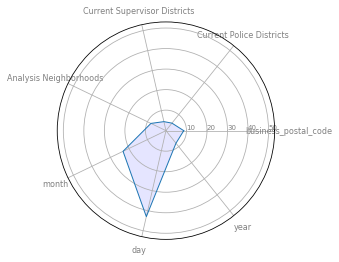

In [68]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# number of variable
categories=list(COLUMNS)#['pclass', 'sex', 'age', 'sibsp', 'parch']
N = len(categories)
print(categories)

# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=list(np.array(IMPs) * 100) #[2.48, 9.63, 13.97, 5.84, 5.46]
print(values)
values += values[:1]
print(values)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
print(angles)
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30,40,50, 60, 70], ["10","20","30", "40", "50", "60", "70"], color="grey", size=7)
plt.ylim(0,max(values) + 10)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

# Show the graph
plt.show()